For part 2 of this week's assignment, I have decided to create a classifier that can identify the type of topography based on the image provided. I have taken 7 types or classes of images, namely mountains, beaches, rivers, ocean, ice landmass, mars surface and moon surface.
I have used a CNN architecture to train my model and have achieved a near 86% accuracy. I will also be attaching screenshots of the training and validation loss along with my code.
The dataset that i used in this project is completely custom made by me using Google Earth Pro application. I took around 100 images of each classes manually, making my training set a total of 700 images.
I also saved my model as the validation loss decreased. I will also be uploading the pre trained model which is a .pth file.
I am putting up the link to the training and test set that I created so that you can have a look(use BITS mail)

Test set: https://drive.google.com/drive/folders/14tqtQnECzQs1eURORDrFQAHOId_9dBLY?usp=sharing

Train set: https://drive.google.com/drive/folders/1H30OU5twXHzNkI_w9f6rqfuII-2qd6IX?usp=sharing

Mounting my Google Drive to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing necessary libraries

In [ ]:
import torch 
from torch import nn
import torch.nn.functional as F
import helper
from torch import optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy

Defining my model architecture using class method

In [ ]:
class Features_Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.cnn1 = nn.Conv2d(3, 16, 3, padding = 1)
    self.cnn2 = nn.Conv2d(16, 32, 3, padding = 1)
    self.cnn3 = nn.Conv2d(32, 64, 3, padding = 1)
    self.maxPool = nn.MaxPool2d(4,4)
    self.fp1 = nn.Linear(64*16, 10000)
    self.fp2 = nn.Linear(10000, 1024)
    self.fp3 = nn.Linear(1024, 128)
    self.fp4 = nn.Linear(128, 7)
    self.dropout = nn.Dropout(p = 0.2)

  def forward(self, x):
    x = self.maxPool(F.relu(self.cnn1(x)))
    x = self.maxPool(F.relu(self.cnn2(x)))
    x = self.maxPool(F.relu(self.cnn3(x)))
    x = x.view(-1,64*16)
    x = self.dropout(F.relu(self.fp1(x)))
    x = self.dropout(F.relu(self.fp2(x)))
    x = self.dropout(F.relu(self.fp3(x)))
    
    x = F.log_softmax(self.fp4(x), dim = 1)

    return x


Preprocessing and loading the training and test set

In [ ]:
data_dir1 = '/content/drive/My Drive/training_set/'
data_dir2 = '/content/drive/My Drive/test_set/'

valid_size = 0.1
transform = transforms.Compose([transforms.Resize((256,256)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(90),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])


trainset = datasets.ImageFolder(data_dir1, transform = transform)
testset = datasets.ImageFolder(data_dir2, transform = transform)

#Splitting the training set into train set and validation set to avoid overfitting the data
num_train = len(trainset)
indices = list(range(num_train))
numpy.random.shuffle(indices)
split = int(numpy.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=20, sampler = train_sampler)
valid_loader = torch.utils.data.DataLoader(trainset, batch_size=20, sampler = valid_sampler)
test_loader = torch.utils.data.DataLoader(testset, batch_size=20, shuffle=True)


Code to load the pretrained model. Skip if you want to train again

In [ ]:
state_dict = torch.load('/content/drive/My Drive/LandFeatureClassifier_CNN.pth')
model = Features_Net()
model.load_state_dict(state_dict)

<All keys matched successfully>

Declaring loss object and optimizer and other necessary variables. Comment the first line if you loaded a pretrained model

Saving model...
Epoch 0   Training loss = 0.09691877805753903   Validation loss = 0.10311763500099752   Decreasing to new minimum
Saving model...
Epoch 1   Training loss = 0.07527823711779251   Validation loss = 0.07394528033128425   Decreasing to new minimum
Saving model...
Epoch 2   Training loss = 0.05875388505828656   Validation loss = 0.06228036666983989   Decreasing to new minimum
Saving model...
Epoch 3   Training loss = 0.051743769999777915   Validation loss = 0.055230557918548584   Decreasing to new minimum
Saving model...
Epoch 4   Training loss = 0.04754408397296868   Validation loss = 0.052904203756531674   Decreasing to new minimum
Epoch 5   Training loss = 0.04475710877884339   Validation loss = 0.05851284959423008   Increasing
Saving model...
Epoch 6   Training loss = 0.0385869305716096   Validation loss = 0.0444926254784883   Decreasing to new minimum
Saving model...
Epoch 7   Training loss = 0.03358569834688709   Validation loss = 0.04448854033626727   Decreasing to ne

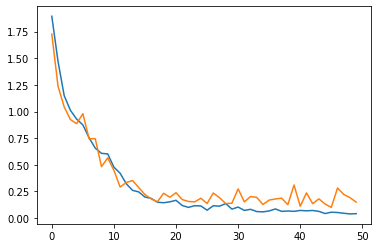

In [ ]:
model = Features_Net()
epochs = 50
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
valid_loss_min = numpy.Inf
train_losses, valid_losses = [], []
count = 0

for epoch in range(epochs):
  train_loss = 0
  valid_loss = 0
  model.train()
  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    tloss = criterion(outputs, labels)
    tloss.backward()
    optimizer.step()
    train_loss += tloss.item()

  model.eval()
  for image, label in valid_loader:
    output = model(image)
    vloss = criterion(output, label)
    valid_loss += vloss.item()
  
  train_losses.append(train_loss/len(train_loader))
  valid_losses.append(valid_loss/len(valid_loader))
  
  #Checking if validation loss is less than the minimum validation loss and if so, saving the model to Google Drive
  if valid_loss < valid_loss_min:
    s = 'Decreasing to new minimum'
    print('Saving model...')
    torch.save(model.state_dict(), '/content/drive/My Drive/LandFeatureClassifier_CNN.pth')
    valid_loss_min = valid_loss
    count = 0

  else:
    s = 'Increasing'
    count += 1

  if count > 5:
    print('Breaking because validation loss is not decreasing')
    break
  
  #Printing out the epoch, training loss, validation loss and whether it is increasing or decreasing
  print('Epoch ' + str(epoch) + '   ' + 'Training loss = ' + str(train_loss/len(train_loader.sampler)) + '   ' + 'Validation loss = '  + str(valid_loss/len(valid_loader.sampler)) + '   ' + s)

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')

In [ ]:
accuracy = 0
count = 0

with torch.no_grad():
  for images, labels in test_loader:
    log_ps = model(images)           
    ps = torch.exp(log_ps)
    top_p, top_class = ps.topk(1, dim=1)
    equals = top_class == labels.view(*top_class.shape)
    for i in range(len(equals)):
      if equals[i] == True:
        count += 1
    
accuracy = count*100/len(test_loader.sampler)
print(accuracy)


84.78260869565217
